In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import signal, fft

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.constrained_layout.use'] = True

# Nombres complexes

## Introduction

Ce chapitre est une révision de la théorie des nombres complexes, un outil mathématique incontournable en génie. Elle est notamment au centre de l’analyse spectrale (analyse de Fourier) qui permet de décomposer un signal en composantes fréquentielles. Les exponentielles complexes de la forme $\mathrm{e}^{j\omega t}$ y jouent un rôle central. On doit également être capable de manipuler les nombres complexes dans l’analyse et la conception de filtres analogiques.

Un nombre complexe $z$ s’exprime comme la somme d’une partie réelle et d’une partie imaginaire :

>$z=a+jb$

où $a$ et $b$ sont des nombres réels, et $j = \sqrt{-1}$. Ce nombre $j$ est une quantité imaginaire, qui a été introduite pour solutionner certains problèmes n’ayant pas de solution dans le domaine des nombres réels. Par exemple, si on demande de déterminer la solution de l’équation

>$x^2 + x + 1 = 0$

On trouve 

>$x_{1,2} = -\frac{1}{2} \pm \frac{1}{2}\sqrt{-3}$

Ce nombre, $\sqrt{-3}$, ne pouvant être évalué dans le domaine des nombres réels (la racine d’un nombre négatif n’existe pas), on fait alors intervenir la quantité imaginaire  $j = \sqrt{-1}$, et on pose

>$x_{1,2} = -\frac{1}{2} \pm \frac{1}{2}\sqrt{(-1)(3)}$

>$x_{1,2} = -\frac{1}{2} \pm \frac{1}{2}\sqrt{-1}\sqrt{3}$

>$x_{1,2} = -\frac{1}{2} \pm \frac{1}{2}j\sqrt{3}$

Ainsi, les racines de ce polynôme d’ordre 2 ont toutes deux une partie réelle égale à $-\frac{1}{2}$, et une partie imaginaire égale à soit $\frac{j}{2}\sqrt{3}$ (première racine) ou $\frac{-j}{2}\sqrt{3}$ (deuxième racine).

La partie imaginaire étant « dans un autre espace » par rapport à la partie réelle, il est naturel de les représenter sur des axes indépendants, i.e. orthogonaux. Ainsi, on représente un nombre complexe dans le plan, avec sa partie réelle sur l’axe horizontal et sa partie imaginaire sur l’axe vertical.


<img src="Images/01_PlanComplexe.png" width="480px" height="400px">

Le nombre complexe $z$ est ainsi vu comme un point dans le plan (on dit, le plan complexe) dont les composantes réelle et imaginaire sont les coordonnées d’un vecteur en 2 dimensions (coordonnées rectangulaires). Alternativement, le point $z$ peut être décrit en coordonnées polaires, i.e. par un rayon $r$ et une phase $\theta$. On a  le lien suivant entre ces coordonnées :

>$a = r\cos(\theta)$

>$b = r\sin(\theta)$

et

>$r^2 = a^2 + b^2$

>$\theta = \arctan(\frac{b}{a})$

Ainsi,

>$z = a + jb$

>$z = r\cos(\theta) + jr\sin(\theta)$

Cette forme polaire d’un nombre complexe peut être écrite de façon plus compacte par le **théorème d’Euler** :

$$\mathrm{e}^{j\theta} = \cos(\theta) + j \sin(\theta)$$

Cette relation n’est pas très intuitive, mais elle peut se démontrer assez facilement en développant les termes en séries de Taylor (retour au CÉGEP…). Ainsi, on peut démontrer que

>$\cos(\theta)=1-\theta^2 /(2 !)+\theta^4 /(4 !)-\theta^6 /(6 !)+\ldots$

>$\sin(\theta)=\theta-\theta^3 /(3 !)+\theta^5 /(5 !)-\theta^7 / (7 !)+\ldots$

En développant de la même manière $\mathrm{e}^{j\theta}$ on trouve


>$\begin{aligned} \mathrm{e}^{j \theta} & =1+j \theta-\theta^2 /(2 !)-j \theta^3 /(3 !)+\theta^4 /(4 !)+j \theta^5 /(5 !)+\ldots\\ & =\left\{1-\theta^2 /(2 !)+\theta^4 /(4 !)+\ldots\right\}+j\left\{\theta-\theta^3 /(3 !)+\theta^5 /(5 !)+\ldots\right\} \\ & =\cos (\theta)+j \quad \sin (\theta)\end{aligned}$

Cette équivalence se présente comme suit dans le plan complexe :

<img src="Images/01_PlanComplexe2.png" width="480px" height="400px">

La forme exponentielle $\mathrm{e}^{j\theta}$ permet de simplifier les calculs sur les complexes, notamment l’opération de division, comme le montrera la prochaine section.

## Opérations sur les nombres complexes

Les opérations d’addition, de soustraction, de multiplication et de division sont définies sur les complexes. Nous les traitons dans ce qui suit. On notera que la forme rectangulaire est plus appropriée pour l’addition et la soustraction, alors que la forme exponentielle rej est plus appropriée pour la multiplication et la division.

### Addition

L’addition de deux nombres complexes $z_1$ et $z_2$ est définie comme suit :

Soient deux nombres complexes

>$z_1 = a_1 + jb_1$

>$z_2 = a_2 + jb_2$

Alors, la somme de ces deux nombres est

>$\begin{aligned} z_3 & = z_1 + z_2 \\ & = a_1 + jb_1 + a_2 + jb_2 \\ &= (a_1 + a_2) + j (b_1 + b_2)\end{aligned}$

i.e. qu’il suffit d’additionner séparément les parties réelles et les parties imaginaires.

### Soustraction

La soustraction est définie de la même façon que l’addition.

Soient deux nombres complexes

>$z_1 = a_1 + jb_1$

>$z_2 = a_2 + jb_2$

>$\begin{aligned} z_3 & = z_1 - z_2 \\ & = a_1 + jb_1 - (a_2 + jb_2) \\ &= (a_1 - a_2) + j (b_1 - b_2)\end{aligned}$

i.e. qu’il suffit de soustraire séparément les parties réelles et les parties imaginaires.


### Multiplication

La multiplication de deux nombres complexes ressemble davantage à une multiplication de polynômes. Plus précisément,

soient deux nombres complexes

>$z_1 = a_1 + jb_1$

>$z_2 = a_2 + jb_2$

alors, le produit de ces deux nombres est

>$\begin{aligned} z_3 & =z_1 z_2 \\ & =\left(a_1+j b_1\right)\left(a_2+j b_2\right) \\ & =a_1 a_2+j^2 b_1 b_2+j\left(a_1 b_2+a_2 b_1\right) \\ & =\left(a_1 a_2-b_1 b_2\right)+j\left(a_1 b_2+a_2 b_1\right)\end{aligned}$

Avec la forme exponentielle, il est plus facile d’effectuer l’opération de multiplication, de même que d’en interpréter le résultat.

Soient donc deux nombres complexes en forme exponentielle :

>$z_1 = r_1 \mathrm{e}^{j\theta1}$

>$z_2 = r_2 \mathrm{e}^{j\theta2}$

>$\begin{aligned} z_3 & =z_1 z_2 \\ & = r_1 \mathrm{e}^{j\theta1} r_2 \mathrm{e}^{j\theta2} \\ & = (r_1 r_2) \mathrm{e}^{j(\theta1+\theta2)} \end{aligned}$


Le résultat du produit de deux nombres complexes a donc un module qui est le produit des modules, et une phase qui est la somme des phases. Avec cette représentation, il est donc facile de situer le résultat de la multiplication dans le plan complexe.

### Division

Il n’est pas recommandé d’effectuer la division de nombres complexes dans leur représentation rectangulaire. La forme exponentielle est beaucoup plus appropriée. On donne ici cependant le résultat d’une division avec la représentation rectangulaire, puis on montrera le calcul pour deux nombres en représentation exponentielle.

Soient d’abord deux nombres complexes en forme rectangulaire :

>$z_1 = a_1 + jb_1$

>$z_2 = a_2 + jb_2$

Alors, le résultat de la division de ces deux nombres est

>$z_3=\frac{z_1}{z_2}=\frac{a_1+j b_1}{a_2+j b_2}=\frac{a_1+j b_1}{a_2+j b_2} \frac{a_2-j b_2}{a_2-j b_2}=\frac{a_1 a_2+b_1 b_2+j\left(a_2 b_1-a_1 b_2\right)}{a_2{ }^2+b_2{ }^2}$

Dans ce calcul, nous avons multiplié le numérateur et le dénominateur par le complexe conjugué du dénominateur (multiplication par « 1 »), de façon à se débarrasser des valeurs complexes au dénominateur.

Le même calcul, avec la forme exponentielle, est beaucoup plus simple. Soient donc deux nombres complexes en forme exponentielle :

>$z_1 = r_1 \mathrm{e}^{j\theta1}$

>$z_2 = r_2 \mathrm{e}^{j\theta2}$

Alors, le résultat de la division de ces deux nombres 

>$\begin{aligned} z_3 & =z_1 / z_2 \\ & = r_1 \mathrm{e}^{j\theta1} / r_2 \mathrm{e}^{j\theta2} \\ & = (r_1 / r_2) \mathrm{e}^{j(\theta1-\theta2)} \end{aligned}$

Le résultat de la division de deux nombres complexes a donc un module qui est le ratio des modules, et une phase qui est la différence des phases. Notez la similitude du résultat avec la multiplication.

### Résumé

Pour **additionner** deux nombres complexes :
- faire la somme des parties réelles
- faire la somme des parties imaginaires

Pour **soustraire** deux nombres complexes :
- faire la différence des parties réelles
- faire la différence des parties imaginaires

Pour **multiplier** deux nombres complexes :
- faire le produit des modules (ou rayons)
- faire la somme des phases

Pour **diviser** deux nombres complexes :
- faire le ratio des modules (ou rayons)
- faire la différence des phases


## Exercices sur les opérations

1. Donnez la forme exponentielle (polaire) des nombres complexes suivants.

>$z_1 = 3 + 2 j$

>$z_2 = 4 - 5 j$

<details>
<summary><b>Réponses</b></summary>

>$z_1 = 3.6 \mathrm{e}^{0.588j}$
    
>$z_1 = 6.4 \mathrm{e}^{-0.896j}$

</details>

2. Donnez la forme rectangulaire des nombres complexes suivants.

>$z_1 = 1.5 \mathrm{e}^{\pi j}$

>$z_2 = 3 \mathrm{e}^{-0.5 j}$

<details>
<summary><b>Réponses</b></summary>

>$z_1 = 0 + 1.5 j$

>$z_2 = 2.63 - 1.44 j$

</details>

3. Pour les paires de nombres complexes suivants, calculez la somme, la différence, le produit et le résultat de la division. Donnez tous les résultats dans la forme polaire.

>$z_1 = 3 + 5 j$

>$z_2 = -1 - 2 j$

___

>$z_3 = 2 \mathrm{e}^{1.5 j}$

>$z_4 = 3 \mathrm{e}^{- j}$

<details>
<summary><b>Réponses</b></summary>

>$z_1 + z_2 = 3.6 \mathrm{e}^{0.983 j}$

>$z_1 - z_2 = 8.1 \mathrm{e}^{1.052 j}$
    
>$z_1 z_2 = 13.0 \mathrm{e}^{-1.004 j}$

>$z_1 / z_2 = 2.6 \mathrm{e}^{3.065 j}$
    
___

>$z_3 + z_4 = 1.8 \mathrm{e}^{-0.292 j}$

>$z_3 - z_4 = 4.8 \mathrm{e}^{1.887 j}$
    
>$z_3 z_4 = 6.0 \mathrm{e}^{0.500 j}$

>$z_3 / z_4 = 0.7 \mathrm{e}^{2.500 j}$

</details>

## Les exponentielles tournantes

Les fonctions harmoniques $\sin(\omega t)$ et $\cos(\omega t)$ sont très importantes pour l’analyse des signaux et des systèmes. Notamment, dans un système Linéaire et Invariant dans le Temps (LTI), seule une fonction harmonique en entrée conserve sa forme en sortie (i.e., un sinus pur en entrée demeure un sinus pur en sortie, de même fréquence, mais avec une amplitude et une phase en général différentes). On ne peut en dire autant d’aucune autre fonction (essayez avec un générateur de signaux de faire passer une fonction périodique triangulaire ou carrée à travers un filtre linéaire, et observez la sortie).

Comme décrit plus haut, un nombre complexe $z = r \mathrm{e}^{j\theta}$ est un point dans le plan complexe, de rayon $r$ et de phase $\theta$. Si on fait varier la phase $\theta$  linéairement avec le temps, i.e.

>$\theta(t) = \omega t$

où $\omega$ est la fréquence angulaire en radians par seconde, on a alors 

>$z(t) = r \mathrm{e}^{j \omega t}$

>$z(t) = r \cos(\omega t) + j r \sin(\omega t)$

On obtient ainsi une fonction périodique (période = $2\pi/\omega$) dont la partie réelle est un cosinus de période $2\pi/\omega$ et la partie imaginaire est un sinus de même période. Les parties réelle (cosinus) et imaginaire (sinus) sont alors vues comme la projection de la fonction $r \mathrm{e}^{j \omega t}$ sur le plan réel et sur le plan imaginaire, respectivement. Ces fonctions évoluent de façon périodique avec le temps, tout comme l’exponentielle tournante $r \mathrm{e}^{j \omega t}$, qui se présente, lorsque tracée en fonction du temps, comme une fonction hélicoïdale (fonction en forme de ressort). On a ainsi une représentation très compacte de fonctions harmoniques, qui sera très utile dans l’analyse spectrale. Ceci se représente graphiquement comme suit :



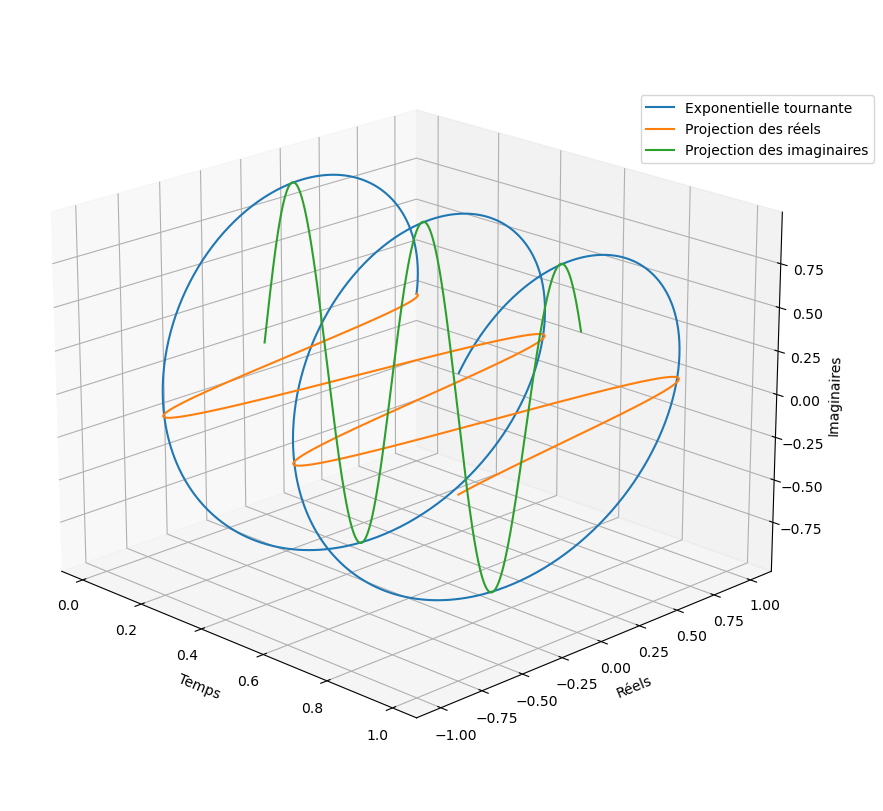

In [2]:
t = np.arange(0, 1, 0.001)
w = 15
z = np.exp(1j*w*t)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot(t, np.real(z), np.imag(z), label="Exponentielle tournante")
ax.plot(t, np.real(z), zs=0, zdir='z', label="Projection des réels")
ax.plot(t, np.imag(z), zs=0, zdir='y', label="Projection des imaginaires")
ax.set_xlabel("Temps",labelpad=5)
ax.set_ylabel("Réels", labelpad=5)
ax.set_zlabel("Imaginaires", labelpad=3)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 0.9))

ax.view_init(elev=20., azim=-45, roll=0)
plt.tight_layout()

## Exercices

1. En utilisant le théorème d’Euler, démontrez les expressions suivantes :

a) $\cos(\theta) = \frac{1}{2} \left(e^{j \theta}+e^{-j \theta}\right)$

b) $\sin(\theta)=\frac{1}{2j}\left(e^{j \theta}-e^{-j \theta}\right)$

c) $\cos^2(\theta)= \frac{1}{2} (1+\cos (2 \theta))$

d) $\sin(\theta)\sin(\phi) = \frac{1}{2} \cos(\theta - \phi) - \frac{1}{2} \cos(\theta + \phi)$

<details>
<summary><b>Réponses</b></summary>

il s’agit ici de faire une démonstration (voir procédural)

</details>

2. Soit $x(t) = \mathrm(e)^{-100t} u(t)$, où $u(t)$ est la fonction échelon, qui vaut 1 pour $t>0$ et 0 pour $t<0$.

a) Evaluer alors l’intégrale suivante :

$$X(\omega)=\int_{t=-\infty}^{\infty} x(t) e^{-j \omega t} d t$$

b) Donnez le module et la phase de $X(\omega)$ en fonction de $\omega$.

Attention : lorsqu’on calcule la phase, il faut bien considérer le signe de la partie réelle car certaines fonctions – calculatrices – retournent la phase entre $–\pi/2$ et $\pi/2$.  Ici, par exemple, la partie réelle vaut 100, donc elle est toujours positive et la phase sera par définition toujours entre $–\pi/2$ et $\pi/2$ – ce n’est pas le cas si la partie réelle devient négative.

<details>
<summary><b>Réponses</b></summary>

a) $X(\omega) = \frac{1}{100+j\omega}$
    
b) $|X(\omega)|=\frac{1}{\sqrt{100^2+\omega^2}}$  et  $\angle X(\omega)=-\arctan \left(\frac{\omega}{100}\right)$

</details>
